# Analytics for Unstructured Data Assignment 2
## Building a Crowdsourced Recommender System

Morning Section: 11am-1pm

Team members:
- Marcus Martinez
- Marifer Martinez-Garcia
- Femke Munting
- Alex Schmelzeis
- Milan Vaghani
- Kennedy Zapalac

Spacy does not run well on a local device. We ran this script on Google Colab, and would recommend doing the same if re-running the analysis below.

In [46]:
# # pip install undected_chromedriver #run this if you are using it for the first time
# Importing modules related to web automation (Selenium)
#from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
#from selenium.webdriver.common.by import By
#from selenium.webdriver.support.ui import WebDriverWait
#from selenium.webdriver.support import expected_conditions as EC
#from selenium.webdriver.common.action_chains import ActionChains
#from selenium.common.exceptions import TimeoutException

# Uncomment the following if using undetected_chromedriver for scraping
# import undetected_chromedriver as uc

# Importing standard libraries
import time
import string
import io
import csv
import re
import shutil
import random
from tempfile import NamedTemporaryFile
import decimal
from collections import Counter, defaultdict
import itertools
from itertools import combinations
import operator
import os

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and manifold learning
from sklearn import manifold

# Natural language processing (NLP)
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter, defaultdict
import re
import string

# Machine learning and text processing
from sklearn import manifold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Scraping
We have commented out the scraping code for now to save time in running our analysis, but you can run it if you remove the comments.

## Scraping for Beer Advocate

In [47]:
# # Initialize the undetected Chrome driver with options
# options = uc.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)

# # Open the BeerAdvocate top-rated beers page
# driver.get('https://www.beeradvocate.com/beer/top-rated/')

# wait = WebDriverWait(driver, 10)

# # Dictionary to store beer data
# beer_data = {}

# # Loop through each beer listed on the page (250 beers)
# for i in range(2, 252):  # Beer list starts from row 2 and goes up to 251
#     try:
#         # Locate the beer name and URL
#         beer_link = wait.until(EC.presence_of_element_located(
#             (By.XPATH, f'//div[@id="ba-content"]/table/tbody/tr[{i}]/td[2]/a')))
#         beer_name = beer_link.text
#         beer_url = beer_link.get_attribute('href')
#         # Store the name and URL in the dictionary
#         beer_data[beer_name] = beer_url

#     except Exception as e:
#         print(f"Error in processing beer {i}: {e}")
#         continue
# driver.quit()

In [48]:
# # Initialize the undetected Chrome driver with options
# options = uc.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)
# # Open the first beer's page
# comments_file = pd.DataFrame( columns = ['Beer','Rating','Review'])

# for key,value in beer_data.items():
#         driver.get(value)
#         reviews = driver.find_elements(By.XPATH,'//div[@id="rating_fullview_content_2"]')
#         for review in reviews[:25]:
#             try:
#                 review_cmmnts = rep5 = review.find_element(By.XPATH,'.//div').text
#                 rating = review.find_element(By.XPATH,'.//span[2]').text
#                 review_cmmnts = review_cmmnts.replace('rDev',"")
#                 k = pd.DataFrame({'Beer': [key], 'Rating': [rating], 'Review': [review_cmmnts]})
#                 comments_file = pd.concat([comments_file, k], ignore_index=True)
#             except:
#                 pass
# driver.quit()

## Scraping for Rate Beer

In [49]:
# # Initialize undetected Chrome driver with options
# options = webdriver.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)

# # Open the BeerAdvocate top-rated beers page
# driver.get('https://www.ratebeer.com/top-beers')

# wait = WebDriverWait(driver, 10)

# # Dictionary to store beer data
# beer_data = {}

# # Wait for the page to load (use dynamic waiting instead of time.sleep)
# time.sleep(5)

# # Loop through each beer listed on the page (usually 50-250 beers)
# for i in range(1, 51):  # Adjust the range based on how many items are loaded
#     try:
#         # Locate the beer name and URL using XPath
#         beer_link = wait.until(EC.presence_of_element_located(
#             (By.XPATH, f'//*[@id="root"]/div[2]/div[2]/div/div/div/div/div/section[2]/div[2]/div/div/div[2]/div[{i}]/div[2]/a/div[1]')))

#         # Get the beer name
#         beer_name = beer_link.text

#         # Get the beer URL
#         beer_url = beer_link.find_element(By.XPATH, '..').get_attribute('href')

#         # Store the name and URL in the dictionary
#         beer_data[beer_name] = beer_url

#     except Exception as e:
#         print(f"Error in processing beer {i}: {e}")
#         continue

# driver.quit()

In [50]:
# # Initialize the undetected Chrome driver with options
# options = uc.ChromeOptions()
# options.add_argument('--no-sandbox')
# options.add_argument('--disable-dev-shm-usage')
# options.add_argument('--window-size=1920,1080')
# options.add_argument('--disable-blink-features=AutomationControlled')  # Helps avoid detection

# # Initialize the Chrome WebDriver using undetected-chromedriver
# driver = uc.Chrome(options=options)

# # Create a DataFrame to store beer reviews

# # Iterate over the beer_data dictionary
# for beer_name, beer_url in beer_data.items():
#     driver.get(beer_url)

#     # Wait for the page to load
#     time.sleep(2)  # You may adjust this wait time or implement a better waiting strategy

#     # Loop through the first 15 reviews
#     for i in range(1, 16):
#         try:
#             # Get the review comment
#             review_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[2]/div[1]/div/div[1]/div'
#             review_comment = driver.find_element(By.XPATH, review_xpath).text

#             # Get the rating
#             rating_xpath = f'//*[@id="root"]/div[2]/div[2]/div/div/div/div[2]/div[1]/div[2]/div/div[3]/div[{i}]/div/section[1]/div[2]/div[2]/div[2]/span[1]'
#             rating = driver.find_element(By.XPATH, rating_xpath).text

#             # Store the data in the DataFrame
#             k = pd.DataFrame({'Beer': [beer_name], 'Rating': [rating], 'Review': [review_comment]})
#             comments_file = pd.concat([comments_file, k], ignore_index=True)

#         except Exception as e:
#             continue

# driver.quit()

In [51]:
# comments_file.to_csv('data/beer_reviews.csv', index=False)

The minimum number of reviews per beer is 1
The maximum number of reviews per beer is 15
The median number of reviews per beer is 6.0


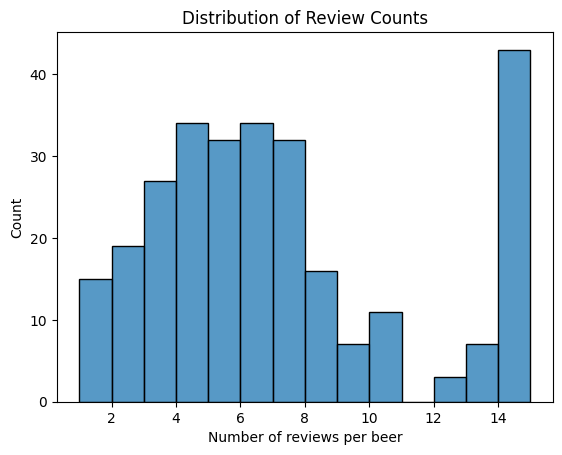

In [52]:
df = pd.read_csv("data/beer_reviews.csv")

reviews = df.groupby(["Beer"])["Review"].count()
# The max number of reviews for one beer is 15, the min is 1

print(f'The minimum number of reviews per beer is {df.groupby(["Beer"])["Review"].count().min()}')
print(f'The maximum number of reviews per beer is {df.groupby(["Beer"])["Review"].count().max()}')
print(f'The median number of reviews per beer is {df.groupby(["Beer"])["Review"].count().median()}')
# Median count is 6; cut off all beers that have less than 5 reviews

# Display frequency of reviews

sns.histplot(reviews, binwidth = 1)
plt.title("Distribution of Review Counts")
plt.xlabel('Number of reviews per beer');

The distribution of review counts demonstrates that some beers only have one or two reviews. This is the result of only keeping reviews with both a rating and a written review. We chose to remove all beers with fewer than 5 reviews. This became particularly relevant when we were choosing the 3 most popular beers by rating; a beer with one rating of 5.0 showed up ahead of a beer with 10 individual ratings of 4.9.

After removing beers with fewer than 5 reviews, the number of beers in our dataset decreased from 280 to 185, and the number of reviews decreased from 1911 to 1645.

In [53]:
# removing beers with less than 5 reviews
more_than_5 = df.groupby(["Beer"])["Review"].count()
more_than_5 = more_than_5[more_than_5 >= 5]
more_than_5 = more_than_5.reset_index()

reduced_df = df[df["Beer"].isin(list(more_than_5["Beer"]))]
len(reduced_df["Beer"].unique())
reduced_df.to_csv("data/reduced_length.csv", index = False)
#len(reduced_df)

# Task B: Beer Attributes

Below we took our beer reviews and pulled out word frequencies to find the most frequent beer attributes. We used the number of unique post mentions as our metric of word frequency. We selected 2 beer profiles to create recommendations for so we could compare their results. Each profile consists of three characteristics, and we ensured these profiles occurred in our dataset by conducting a pairwise lift analysis. Each of the attributes in the profile had to have a lift greater than 1 with the other 2 attributes in the profile to ensure their co-occurrence.

For the first profile, the three attributes we chose were: "dark", "chocolate", "vanilla". For the second profile, the three attributes we chose were: "orange", "hazy", "white".

In [54]:
# post word frequency
# Download stopwords from the NLTK package
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Input and output filenames
input_filename = 'data/reduced_length.csv'  # Input file
word_freq_output = 'data/word_post_count.csv'  # Output file for word post count

# Function to clean text (removing punctuation and stopwords)
def clean_text(post):
    """
    Cleans a given post by removing punctuation and stopwords, and converting text to lowercase.
    """
    post = re.sub(f'[{re.escape(string.punctuation)}]', '', post.lower())  # Remove punctuation and convert to lowercase
    words = post.split()  # Tokenize the post
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Step 1: Clean the posts from the CSV
def clean_posts(input_file):
    """
    Reads the input CSV file, cleans the posts, and returns a list of cleaned posts.
    """
    df = pd.read_csv(input_file)  # Load CSV
    posts = df.iloc[:, 2]  # Extract the third column (posts)
    cleaned_posts = posts.apply(clean_text)  # Apply cleaning to each post
    return cleaned_posts

# Step 2: Use CountVectorizer to count how many posts each word appears in
def count_word_occurrences(posts):
    """
    Uses CountVectorizer to count how many posts each word appears in.
    """
    vectorizer = CountVectorizer(binary=True)  # binary=True to count post occurrences (not word frequency)
    X = vectorizer.fit_transform(posts)  # Transform the posts into a document-term matrix
    word_counts = X.toarray().sum(axis=0)  # Sum the binary values to get the number of posts each word appears in
    words = vectorizer.get_feature_names_out()  # Get the words from the vocabulary
    word_post_count = dict(zip(words, word_counts))  # Map words to their post counts
    return word_post_count

# Step 3: Write the word counts to a CSV file
def write_word_counts_to_csv(word_post_count, output_file):
    """
    Writes the word-post-counts to the specified CSV file.
    """
    word_post_count_df = pd.DataFrame(list(word_post_count.items()), columns=["Word", "Post_Count"])
    word_post_count_df = word_post_count_df.sort_values(by="Post_Count", ascending=False)
    word_post_count_df.to_csv(output_file, index=False)
    print(f"Word post counts written to {output_file}")

# Main function to run all steps
def main():
    # Step 1: Clean posts
    cleaned_posts = clean_posts(input_filename)

    # Step 2: Count how many posts each word appears in
    word_post_count = count_word_occurrences(cleaned_posts)

    # Step 3: Write word post counts to CSV
    write_word_counts_to_csv(word_post_count, word_freq_output)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Word post counts written to data/word_post_count.csv


In [55]:
# word post frequencies used to determine attributes
df = pd.read_csv('data/word_post_count.csv')
df.head(15)

,Word,Post_Count
0,head,855
1,taste,608
2,bottle,545
3,aroma,513
4,beer,475
5,sweet,468
6,dark,467
7,pours,446
8,chocolate,444
9,black,436


To learn more about general beer qualities, we asked ChatGPT about what qualities someone might care about when looking for a beer. This is what it came up with:
- **Appearance**: This includes color, clarity, and head (foam) retention. Beer can range in color from pale straw to dark brown or black. Clarity can be clear, hazy, or opaque, depending on the style.
- **Aroma**: The smell of the beer, which can include notes of hops (citrusy, floral, piney), malt (caramel, chocolate, bread), yeast (fruity, spicy), and other adjuncts (herbs, spices, fruit). Aroma gives a preview of the flavors.
- **Flavor**: This includes the balance between sweetness (from malt) and bitterness (from hops), as well as other flavors like fruitiness, spiciness, roasted notes, and sourness. The intensity and complexity of these flavors vary with beer styles.
- **Mouthfeel**: Refers to the body (light, medium, full), carbonation (sparkling or flat), and texture (smooth, creamy, dry). Mouthfeel contributes to the overall drinking experience.
- **Bitterness (IBU)**: Measured in International Bitterness Units (IBU), this represents the bitterness derived from hops. Higher IBU generally indicates more bitterness, but balance with malt sweetness is key.
- **Alcohol Content (ABV)**: Alcohol by Volume (ABV) indicates the strength of the beer. Typical beers range from around 3% to 12% ABV or higher.
- **Aftertaste (Finish)**: The lingering taste after swallowing the beer. It can be dry, sweet, bitter, or have specific flavor notes.

**Given these general qualities, here are the frequent beer attributes that show up in our dataset:**
We chose a large number of attributes so we could select the best beer profile.
1. Sweet
2. Dark
3. Chocolate
4. Black
5. Vanilla
6. Light
7. Carbonation
8. Bourbon
9. Coffee
10. Smooth
11. Brown
12. White
13. Smooth
14. Medium
15. Fruit
16. Full
17. Malt
18. Barrel
19. Oak
20. Caramel
21. Tan
22. Thick
23. Stout
24. Rich
25. Creamy
26. Bitter
27. Dry
28. Roasted
29. Orange
30. Citrus
31. Hazy
32. Honey
33. Deep
34. Thin
35. Balanced

Some of these attributes might not occur together, such as "light" and "medium" because they both refer to the body of the beer. Therefore, we must use lift analysis to make sure that the attributes we pick to recommend a beer are also likely to occur together.

In [56]:
# lift analysis: check which attributes occur together
# Initialize global variables and data structures
df_lift = pd.DataFrame(columns=['word1', 'word2', 'lift_value'])  # To store lift values
word_frequency = {}  # Dictionary to store word frequency in posts
word_pair_frequency = defaultdict(dict)  # Dictionary to store word pair co-occurrence frequency
results_dict = {}  # Dictionary to store results with lift values for word pairs
file_length = 0  # Number of rows in the input file
itr = 0  # Row iterator for the lift DataFrame

# File paths
input_file = 'data/reduced_length.csv'  # Input data file
pair_keys_file = 'data/beer_attributes.txt'  # File containing the words to calculate lift
output_lift_values = 'data/Lift_Values.csv'  # Output file for lift values
output_lift_matrix = 'data/Lift_Matrix.csv'  # Output file for lift matrix

# Load NLTK stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text (removes punctuation and stopwords)
def clean_text(text):
    """
    Cleans a given text by removing punctuation, converting it to lowercase,
    and tokenizing it, ignoring any stopwords.
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    cleaned_tokens = [word for word in tokens if word not in stop_words]

    return cleaned_tokens

# Step 1: Load the words from the edmunds_pair_keys.txt file and generate all pairs
def load_word_pairs(filename):
    """
    Loads words from a file where words are comma-separated in each row.
    Returns a list of all possible word pairs for each row.
    """
    word_pairs = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            # Generate all possible word pairs from each row
            pairs = list(combinations(row, 2))
            word_pairs.extend(pairs)

    return word_pairs

# Step 2: Process the input CSV file to extract posts and clean the text
def process_input_file(input_filename):
    """
    Processes the input CSV file to extract and clean posts. Each post is tokenized,
    cleaned of punctuation and stopwords, and stored in a list.
    """
    posts = []
    global file_length
    df = pd.read_csv(input_filename)  # Load the CSV file into a DataFrame

    # Assuming 'comments' is the column that contains the text
    for index, row in df.iterrows():
        cleaned_post = clean_text(row['Review'])  # Clean and tokenize the post
        posts.append(cleaned_post)

    file_length = len(df)  # Get the total number of rows
    return posts

# Step 3: Calculate word frequencies and word pair co-occurrences (distance ≥ 5 words)
def calculate_frequencies(posts):
    """
    Calculates the frequency of individual words and word pairs within the posts.
    Updates the global word_frequency and word_pair_frequency dictionaries.
    Only considers word pairs that are 5 or more words apart.
    """
    global word_frequency, word_pair_frequency

    for post in posts:
        word_positions = {}  # Dictionary to track positions of each word

        # Track word positions
        for idx, word in enumerate(post):
            if word not in word_positions:
                word_positions[word] = []
            word_positions[word].append(idx)

        # Count word frequencies
        unique_words = set(post)  # Track unique words in the post to avoid double counting
        for word in unique_words:
            word_frequency[word] = word_frequency.get(word, 0) + 1

        # Track word pairs that have already been marked as co-occurring in this post
        seen_pairs = set()
        # Count word pair co-occurrences with distance check
        for word1 in word_positions:
            for word2 in word_positions:
                if word1 != word2 and (word1, word2) not in seen_pairs:
                    # Check if the words are 5 or fewer positions apart
                    found_pair = False
                    for pos1 in word_positions[word1]:
                        for pos2 in word_positions[word2]:
                            if abs(pos1 - pos2) <= 7:
                                word_pair_frequency[word1][word2] = word_pair_frequency.get(word1, {}).get(word2, 0) + 1
                                seen_pairs.add((word1, word2))  # Mark this pair as seen
                                found_pair = True
                                break  # No need to check more positions; move to the next pair
                        if found_pair:
                            break  # Stop after finding one valid pair in this post

# Step 4: Calculate the lift between word pairs
def calculate_lift(word_pairs):
    """
    Calculates the lift between word pairs using the formula:
    Lift(word1, word2) = P(word1 AND word2) / (P(word1) * P(word2))
    Lift is written to the lift values CSV and stored in a DataFrame for further processing.
    """
    global itr

    for word1, word2 in word_pairs:
        # Get the frequency of word1, word2, and their co-occurrence
        freq_word1 = word_frequency.get(word1, 0)
        freq_word2 = word_frequency.get(word2, 0)
        co_occurrence = word_pair_frequency.get(word1, {}).get(word2, 0)

        # Calculate probabilities
        p_word1 = freq_word1 / file_length if freq_word1 else 0
        p_word2 = freq_word2 / file_length if freq_word2 else 0
        p_word1_and_word2 = co_occurrence / file_length if co_occurrence else 0

        # Avoid division by zero
        if p_word1 > 0 and p_word2 > 0:
            lift_value = p_word1_and_word2 / (p_word1 * p_word2) if (p_word1 * p_word2) > 0 else 0
        else:
            lift_value = 0
        # Store lift value in DataFrame
        df_lift.loc[itr] = [word1, word2, lift_value]
        itr += 1
    return df_lift

# Step 5: Write lift values and matrix to CSV
def save_results(df_lift):
    """
    Writes the calculated lift values to a CSV file and also generates a lift matrix,
    saving it to another CSV.
    """
    # Save lift values DataFrame to CSV
    # must create duplicate word pairs to create 10x10 matrix
    df_lift2 = pd.DataFrame({'word1':df_lift.word2, 'word2':df_lift.word1, 'lift_value':df_lift.lift_value})
    df_lift = pd.concat([df_lift, df_lift2], ignore_index=True)
    df_lift.to_csv(output_lift_values, index=False)

    # Generate lift matrix
    lift_matrix = pd.pivot_table(df_lift, values='lift_value', index='word1', columns='word2', fill_value=0)
    lift_matrix.index.name = ''
    lift_matrix.to_csv(output_lift_matrix)

# Main function to run all steps
def main():
    # Step 1: Load word pairs
    word_pairs = load_word_pairs(pair_keys_file)

    # Step 2: Process the input file to extract posts
    posts = process_input_file(input_file)

    # Step 3: Calculate frequencies
    calculate_frequencies(posts)

    # Step 4: Calculate lift values
    df_lift = calculate_lift(word_pairs)

    # Step 5: Save results
    save_results(df_lift)

# Run the script
if __name__ == "__main__":
    main()

In [57]:
df = pd.read_csv('data/Lift_Matrix.csv', index_col=0)

In [58]:
# lift for profile 1: dark, chocolate, vanilla
df.loc[['dark', 'chocolate', 'vanilla'], ['dark', 'chocolate', 'vanilla']]

,dark,chocolate,vanilla
dark,0.000000,1.416647,1.180907
chocolate,1.416647,0.000000,1.969152
vanilla,1.180907,1.969152,0.000000


In [59]:
# lift for profile 2: orange, hazy, white
df.loc[['orange', 'hazy', 'white'],['orange', 'hazy', 'white']]

,orange,hazy,white
orange,0.000000,2.461948,2.245678
hazy,2.461948,0.000000,3.225596
white,2.245678,3.225596,0.000000


As you can see, the pairwise lift for any two attributes in our profiles is greater than 1, meaning these profiles actually occur in our dataset.

# Task C: Similarity Analysis

We chose to lemmatize our corpus before performing cosine similarities in order to improve the predictive power of our model. These techniques will increase the co-occurrence of words and likely increase the number of reviews associated with our user’s chosen attributes.

In [60]:
import nltk
nltk.download('wordnet')

from scipy.sparse import csr_matrix

# Initializing Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing the text (incorporating stemming and lemmatization)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()

    # Removing the stop words and applying both stemming and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# We are lemmatizing words, but not stemming them; stemming will produce words that have no meaning on their own and will make our analysis more challenging

# Loading in the scraped beer reviews
beer_reviews = pd.read_csv('data/reduced_length.csv')

# Applyin text preprocessing to all reviews
beer_reviews['Review'] = beer_reviews['Review'].apply(preprocess_text)

# The 3 determined important attributes from Part B
attributes = ["dark", "chocolate", "vanilla"] # profile 1
# attributes = ["orange", "hazy", "white"] # profile 2

# Preprocessing the attributes
attributes_str = preprocess_text(' '.join(attributes))

# Initializing the Bag-of-Words Model
vectorizer = CountVectorizer()

# Fit transforming both the reviews and the attributes
review_vectors = vectorizer.fit_transform(beer_reviews['Review'])
attributes_vector = vectorizer.transform([attributes_str])

def normalize(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:  # Prevent division by zero
        return vector
    return vector / norm

normalized_data = []
row_indices = []
col_indices = []

for i in range(review_vectors.shape[0]):
    row = review_vectors[i].toarray().flatten()  # Convert sparse row to a dense array
    normalized_row = normalize(row)  # Normalize the row

    # Get the non-zero elements and their column indices after normalization
    non_zero_cols = np.nonzero(normalized_row)[0]
    non_zero_values = normalized_row[non_zero_cols]

    # Store the normalized data for constructing a new sparse matrix
    normalized_data.extend(non_zero_values)
    row_indices.extend([i] * len(non_zero_values))
    col_indices.extend(non_zero_cols)

# Create a new sparse matrix using the normalized data
review_vectors = csr_matrix((normalized_data, (row_indices, col_indices)),
                                      shape=review_vectors.shape)

normalized_data = []
row_indices = []
col_indices = []

for i in range(attributes_vector.shape[0]):
    row = attributes_vector[i].toarray().flatten()  # Convert sparse row to a dense array
    normalized_row = normalize(row)  # Normalize the row

    # Get the non-zero elements and their column indices after normalization
    non_zero_cols = np.nonzero(normalized_row)[0]
    non_zero_values = normalized_row[non_zero_cols]

    # Store the normalized data for constructing a new sparse matrix
    normalized_data.extend(non_zero_values)
    row_indices.extend([i] * len(non_zero_values))
    col_indices.extend(non_zero_cols)

# Create a new sparse matrix using the normalized data
attributes_vector = csr_matrix((normalized_data, (row_indices, col_indices)),
                                      shape=attributes_vector.shape)


# Calculating the cosine similarity between each review and the 3 important attributes
sim_scores1 = cosine_similarity(review_vectors, attributes_vector).flatten()

# Adding the similarity scores as a column to the DataFrame
beer_reviews['similarity_score'] = sim_scores1

# Storing the results as a DataFrame
sim_scores1_df = beer_reviews[['Beer', 'Review', 'similarity_score']]

# Saving the results to a CSV output file
sim_scores1_df.to_csv('data/similarity_scores.csv', index=False)

# Printing out the first 5 results (for visualization)
display(sim_scores1_df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Beer,Review,similarity_score
0,Kentucky Brunch Brand Stout,sampled brewery bottle version beer pours visc...,0.174078
1,Kentucky Brunch Brand Stout,perfect barrel aged stout overly sweet nice ba...,0.000000
2,Kentucky Brunch Brand Stout,flirtation maple come crescendo toppling golia...,0.238479
3,Kentucky Brunch Brand Stout,flirtation maple come crescendo toppling golia...,0.238479
4,Kentucky Brunch Brand Stout,tap tg part kbbs release day rating version pe...,0.000000


# Task D: Sentiment Analysis

We loaded the CSV of beer reviews and used VADER to compute sentiment scores (negative, neutral, positive, and compound) for each review. We updated Vader's dictionary to include beer-specific positive and negative terms.

In [61]:
# Load CSV file
csvFile = pd.read_csv('data/reduced_length.csv')

# Set up the analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Define custom sentiment update function
def get_sentiment(sentence):
    sid = SentimentIntensityAnalyzer()
    # Custom lexicon update with expanded beer-related sentiments, range from 2.5 to -2.5
    newWords = {
        # Positive Sentiment Words
        'crisp': 2.0, 'refreshing': 2.5, 'smooth': 2.3, 'balanced': 2.2,
        'aromatic': 2.0, 'malty': 1.8, 'hoppy': 1.7, 'fruity': 1.9,
        'creamy': 2.0, 'sessionable': 2.4, 'floral': 1.8, 'zesty': 1.9,
        'rich': 2.5, 'velvety': 2.5, 'fragrant': 2.4, 'robust': 2.3,
        'lively': 2.2, 'layered': 2.1, 'subtle': 2.0, 'caramel': 2.1,
        'toffee': 2.0, 'spicy': 1.9, 'vanilla': 2.3, 'nutty': 2.0,
        'biscuity': 1.8, 'citrusy': 2.0, 'piney': 1.9, 'clean': 2.0,
        'tropical': 2.2, 'silky': 2.5, 'elegant': 2.4, 'peppery': 1.7,
        'herbal': 1.8,

        # Negative Sentiment Words
        'skunky': -2.5, 'watery': -2.0, 'bitter': -2.2, 'flat': -2.3,
        'stale': -2.5, 'sour': -2.0, 'overpowering': -1.8, 'burnt': -2.5,
        'alcoholic': -2.1, 'cloying': -2.3, 'astringent': -2.0, 'metallic': -2.4,
        'harsh': -2.5, 'off-putting': -2.4, 'musty': -2.3, 'overcarbonated': -2.1,
        'soapy': -2.3, 'chemically': -2.4, 'clunky': -2.2, 'thin': -2.0,
        'overripe': -2.3, 'soggy': -2.1, 'grainy': -1.9, 'chalky': -2.2,
        'muddy': -2.3, 'dull': -2.0, 'medicinal': -2.4, 'boozy': -2.2,
        'syrupy': -2.3,

        # Neutral/Context-Dependent Words
        'light': 1.0, 'dry': 1.2, 'full-bodied': 1.5, 'funky': 0.5,
        'earthy': 0.7, 'toasty': 1.5, 'grassy': 1.0, 'oaky': 1.2,
        'tangy': 0.9, 'woody': 1.1, 'fizzy': 1.0, 'spiced': 1.0,
        'bready': 0.8, 'oily': -1.0, 'prickly': 1.0, 'drying': -1.0
    }
    sid.lexicon.update(newWords)  # Update the lexicon
    score = sid.polarity_scores(sentence)  # Get sentiment scores
    return score  # Return full sentiment scores

# Create empty lists to store sentiment scores
neg = []
neu = []
pos = []
compound = []

# Loop through the texts and get the sentiment scores using the updated function
for text in csvFile["Review"]:
    scores = get_sentiment(text)
    neg.append(scores['neg'])
    neu.append(scores['neu'])
    pos.append(scores['pos'])
    compound.append(scores['compound'])

# Add sentiment scores as new columns to the DataFrame
sentiments = csvFile
sentiments['neg'] = neg
sentiments['neu'] = neu
sentiments['pos'] = pos
sentiments['compound'] = compound

# Display the updated DataFrame with sentiment scores
display(sentiments.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Beer,Rating,Review,neg,neu,pos,compound
0,Kentucky Brunch Brand Stout,4.61,"Sampled at the brewery, this is the 2022 bottl...",0.027,0.762,0.210,0.9938
1,Kentucky Brunch Brand Stout,4.71,The perfect barrel aged stout. Not overly swee...,0.205,0.553,0.242,0.2216
2,Kentucky Brunch Brand Stout,5.00,The flirtation with maple comes to a crescendo...,0.033,0.715,0.252,0.9924
3,Kentucky Brunch Brand Stout,4.80,The flirtation with maple comes to a crescendo...,0.033,0.715,0.252,0.9924
4,Kentucky Brunch Brand Stout,4.98,On tap at TG for part of KBBS release day - ra...,0.073,0.558,0.369,0.9761


# Task E: Beer Evaluation and Recommendation

We created an evaluation score for each beer by multiplying the sentiment and similarity scores.  We then recommended the three beers with the highest similarity*sentiment score. This ensured that only similar beers with positive reviews made it to our end-user.

In [62]:
# The score is similarity * sentiment

sentiment_scores = sentiments[["Beer", "compound"]]
sim_scores1 = sim_scores1_df[["Beer", "similarity_score"]]

scores = pd.DataFrame()
scores["Beer"] = sentiment_scores["Beer"]
scores["Score"] = sentiment_scores["compound"] * sim_scores1["similarity_score"]
print(scores.groupby(["Beer"])["Score"].mean().sort_values(ascending = False)[:3])

top_3_bow = list(scores.groupby(["Beer"])["Score"].mean().sort_values(ascending = False).head(3).index)

Beer
Fundamental Observation                                   0.295056
Speedway Stout - Bourbon Barrel-Aged                      0.249727
Somewhere, Something Incredible Is Waiting To Be Known    0.246152
Name: Score, dtype: float64


The above are the three beers we would recommend to a customer who likes dark, chocolate and vanilla in their beers.

In [63]:
# Recommendations for profile 2 (redoing some of what we did above)
# Initializing Lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocessing the text (incorporating stemming and lemmatization)
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()

    # Removing the stop words and applying both stemming and lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# We are lemmatizing words, but not stemming them; stemming will produce words that have no meaning on their own and will make our analysis more challenging

# Loading in the scraped beer reviews
beer_reviews = pd.read_csv('data/reduced_length.csv')

# Applyin text preprocessing to all reviews
beer_reviews['Review'] = beer_reviews['Review'].apply(preprocess_text)

attributes = ["orange", "hazy", "white"] # profile 2

# Preprocessing the attributes
attributes_str = preprocess_text(' '.join(attributes))

# Initializing the Bag-of-Words Model
vectorizer = CountVectorizer()

# Fit transforming both the reviews and the attributes
review_vectors = vectorizer.fit_transform(beer_reviews['Review'])
attributes_vector = vectorizer.transform([attributes_str])

def normalize(vector):
    norm = np.linalg.norm(vector)
    if norm == 0:  # Prevent division by zero
        return vector
    return vector / norm

normalized_data = []
row_indices = []
col_indices = []

for i in range(review_vectors.shape[0]):
    row = review_vectors[i].toarray().flatten()  # Convert sparse row to a dense array
    normalized_row = normalize(row)  # Normalize the row

    # Get the non-zero elements and their column indices after normalization
    non_zero_cols = np.nonzero(normalized_row)[0]
    non_zero_values = normalized_row[non_zero_cols]

    # Store the normalized data for constructing a new sparse matrix
    normalized_data.extend(non_zero_values)
    row_indices.extend([i] * len(non_zero_values))
    col_indices.extend(non_zero_cols)

# Create a new sparse matrix using the normalized data
review_vectors = csr_matrix((normalized_data, (row_indices, col_indices)),
                                      shape=review_vectors.shape)

normalized_data = []
row_indices = []
col_indices = []

for i in range(attributes_vector.shape[0]):
    row = attributes_vector[i].toarray().flatten()  # Convert sparse row to a dense array
    normalized_row = normalize(row)  # Normalize the row

    # Get the non-zero elements and their column indices after normalization
    non_zero_cols = np.nonzero(normalized_row)[0]
    non_zero_values = normalized_row[non_zero_cols]

    # Store the normalized data for constructing a new sparse matrix
    normalized_data.extend(non_zero_values)
    row_indices.extend([i] * len(non_zero_values))
    col_indices.extend(non_zero_cols)

# Create a new sparse matrix using the normalized data
attributes_vector = csr_matrix((normalized_data, (row_indices, col_indices)),
                                      shape=attributes_vector.shape)


# Calculating the cosine similarity between each review and the 3 important attributes
sim_scores2 = cosine_similarity(review_vectors, attributes_vector).flatten()

# Adding the similarity scores as a column to the DataFrame
beer_reviews['similarity_score'] = sim_scores2

# Storing the results as a DataFrame
sim_scores2_df = beer_reviews[['Beer', 'Review', 'similarity_score']]

# Saving the results to a CSV output file
sim_scores2_df.to_csv('data/similarity_scores.csv', index=False)

sentiment_scores = sentiments[["Beer", "compound"]]
sim_scores2 = sim_scores2_df[["Beer", "similarity_score"]]

scores2 = pd.DataFrame()
scores2["Beer"] = sentiment_scores["Beer"]
scores2["Score"] = sentiment_scores["compound"] * sim_scores2["similarity_score"]
print(scores2.groupby(["Beer"])["Score"].mean().sort_values(ascending = False)[:3])

Beer
Fort Point Pale Ale - Double Dry Hopped    0.187735
In Perpetuity                              0.170944
Emperor Julius                             0.145983
Name: Score, dtype: float64


The three beers we would recommend change based on the beer profile used. If a customer likes orange, hazy, and white beers, we would recommend these beers instead.

# Task F: Beer Recommendation Using Word Vectors

Instead of using bag-of-words cosine similarity, we used word vectors for our recommendations. Using the spaCy package, we computed similarity based on the word vectors of the reviews and compared the recommendations from both methods.

Word embeddings are generally considered the superior way to perform NLP, but as you will see below this is not always the case. It actually might be better to use BOW models for recommender systems because 2 beer attributes, such as "light" and "dark", might be used in a similar context (describing the body of the beer), but they would lead to very different recommendations.

You can see how the two different beer profiles from part B lead to the exact same recommendations when using spaCy similarity * sentiment score.

In [65]:
# Recommendations for beer profile 1 (dark, chocolate, vanilla)
# implemented as below to keep Python from outputting "requirements met" notifications. The en_core_web_md does not need to be downloaded each
# time if running locally

import spacy
import pandas as pandas
import os
import sys
import contextlib

with open(os.devnull, "w") as f, contextlib.redirect_stdout(f):
    !python -m spacy download en_core_web_md

nlp = spacy.load('en_core_web_md')

# attribute_doc = nlp('orange, hazy, white')
attribute_doc = nlp("dark, chocolate, vanilla")

spacy_similarities = []

df = pd.read_csv("data/reduced_length.csv")

for i in range(len(df)):
    review = nlp(df.loc[i, "Review"])
    spacy_similarities.append(review.similarity(attribute_doc))

# create recommendations based on word embeddings and sentiment analysis
spacy_df_1 = df
spacy_df_1["spacy_sim"] = spacy_similarities
spacy_df_1['spacy_scores'] = spacy_df_1['spacy_sim'] * sentiment_scores['compound']

top_beers_spacy_1 = spacy_df_1.groupby(["Beer"])["spacy_scores"].mean().sort_values(ascending = False)[:3]
top_beers_spacy_1

<ipython-input-65-c25306053be2>:25: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  spacy_similarities.append(review.similarity(attribute_doc))


,spacy_scores
Beer,
Speedway Stout - Bourbon Barrel-Aged,0.735776
Abraxas - Barrel-Aged,0.700278
Double Sunshine,0.695278


In [66]:
# implemented as below to keep Python from outputting "requirements met" notifications. The en_core_web_md does not need to be downloaded each
# time if running locally

nlp = spacy.load('en_core_web_md')

attribute_doc = nlp('orange, hazy, white')

spacy_similarities = []

df = pd.read_csv("data/reduced_length.csv")

for i in range(len(df)):
    review = nlp(df.loc[i, "Review"])
    spacy_similarities.append(review.similarity(attribute_doc))

# create recommendations based on word embeddings and sentiment analysis
spacy_df_2 = df
spacy_df_2["spacy_sim"] = spacy_similarities
spacy_df_2['spacy_scores'] = spacy_df_2['spacy_sim'] * sentiment_scores['compound']

top_beers_spacy_2 = spacy_df_2.groupby(["Beer"])["spacy_scores"].mean().sort_values(ascending = False)[:3]
top_beers_spacy_2

<ipython-input-66-0b6c4d62141c>:14: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  spacy_similarities.append(review.similarity(attribute_doc))


,spacy_scores
Beer,
Speedway Stout - Bourbon Barrel-Aged,0.707211
Double Sunshine,0.677491
Abraxas - Barrel-Aged,0.670848


Two different beer profiles (orange, white, and hazy vs. dark, chocolate, and vanilla) produced the exact same recommendations when using a combination of spacy and sentiment analysis. In comparison, the bag of words model *did* produce different recommendations for different beer profiles. This indicates that bag of words might provide better recommendations than spaCy would.

We will continue our analysis using the first beer profile (dark, chocolate, and vanilla).

In [68]:
attributes = ["dark", "chocolate", "vanilla"]
spacy_3_beers = list(top_beers_spacy_1.index)
spacy_beers_df = df[df["Beer"].isin(spacy_3_beers)]

print(f"The total number of reviews for the spacy recommended beers is: {len(spacy_beers_df)}")

contains_attr1 = spacy_beers_df["Review"].str.lower().str.contains('dark')
contains_attr2 = spacy_beers_df["Review"].str.lower().str.contains('chocolate')
contains_attr3 = spacy_beers_df["Review"].str.lower().str.contains('vanilla')


num_attributes = contains_attr1.astype(int) + contains_attr2.astype(int) + contains_attr3.astype(int)
perc_attributes = num_attributes.value_counts() / len(spacy_beers_df)
perc_attributes = perc_attributes.reset_index().rename(columns = {'Review':'number of attributes', 'count':'percent of reviews containing'}).sort_values(by = 'number of attributes')
print('\nThis table displays the number of attributes contained within a review and the percentage of reviews containing that many attributes.')
display(perc_attributes)

print(f'\n{round(contains_attr1.mean() * 100, 2)}% of reviews contain dark.')
print(f'\n{round(contains_attr2.mean() * 100, 2)}% of reviews contain chocolate.')
print(f'\n{round(contains_attr3.mean() * 100, 2)}% of reviews contain vanilla.')


The total number of reviews for the spacy recommended beers is: 17

This table displays the number of attributes contained within a review and the percentage of reviews containing that many attributes.


,number of attributes,percent of reviews containing
2,0,0.235294
1,1,0.235294
3,2,0.117647
0,3,0.411765



52.94% of reviews contain dark.

52.94% of reviews contain chocolate.

64.71% of reviews contain vanilla.


This output demonstrates that the recommendations you get with spacy might not be pertinent. 23% of the reviews might not contain any of the attributes the recommendation is based on. We can't be certain that the recommendations Spacy is providing actually meet the customer's requirements.

In [69]:
bow_3_beers = df[df["Beer"].isin(top_3_bow)]

print(f"The total number of reviews for the BOW recommended beers is: {len(bow_3_beers)}")

contains_attr1 = bow_3_beers["Review"].str.lower().str.contains('dark', case=False)
contains_attr2 = bow_3_beers["Review"].str.lower().str.contains('chocolate', case=False)
contains_attr3 = bow_3_beers["Review"].str.lower().str.contains('vanilla', case=False)

num_attributes = contains_attr1.astype(int) + contains_attr2.astype(int) + contains_attr3.astype(int)
perc_attributes = num_attributes.value_counts() / len(bow_3_beers)
perc_attributes = perc_attributes.reset_index().rename(columns = {'Review':'number of attributes', 'count':'percent of reviews containing'}).sort_values(by = 'number of attributes')
print('\nThis table displays the number of attributes contained within a review and the percentage of reviews containing that many attributes.')
display(perc_attributes)

print(f'\n{round(contains_attr1.mean() * 100, 2)}% of reviews contain dark.')
print(f'\n{round(contains_attr2.mean() * 100, 2)}% of reviews contain chocolate.')
print(f'\n{round(contains_attr3.mean() * 100, 2)}% of reviews contain vanilla.')

The total number of reviews for the BOW recommended beers is: 22

This table displays the number of attributes contained within a review and the percentage of reviews containing that many attributes.


,number of attributes,percent of reviews containing
3,0,0.090909
2,1,0.090909
1,2,0.181818
0,3,0.636364



72.73% of reviews contain dark.

81.82% of reviews contain chocolate.

81.82% of reviews contain vanilla.


In comparison, a larger percent of the reviews for the BOW model contain the required attributes. We can be more confident in these recommendations when using a short list of attributes.

# Task G: Highly Rated Beers

We looked at the three beers with the highest ratings and found the bag of words and SpaCy similarity scores between these top-rated beers and our customer's preferred attributes. We then identified the attributes associated with each of the top three rated beers in order to identify customer profiles that could reliably use the top ratings of beers to pick their beverage of choice.

In [70]:
df = pd.read_csv("data/reduced_length.csv")
average_ratings = df.groupby(["Beer"])["Rating"].mean().sort_values(ascending = False)
average_ratings.head(3)

,Rating
Beer,
M.J.K.,4.843333
Kentucky Brunch Brand Stout,4.828571
A Deal With The Devil - Triple Oak-Aged,4.798000


In [1]:
mjk_df = df[df["Beer"] == "M.J.K."]
kentucky_df = df[df["Beer"] == "Kentucky Brunch Brand Stout"]
devil_df = df[df["Beer"] == "A Deal With The Devil - Triple Oak-Aged"]

mjk_df.to_csv("data/mjk.csv")
kentucky_df.to_csv("data/kentucky.csv")
devil_df.to_csv("data/devil.csv")

top_three_beers = ["M.J.K.", "Kentucky Brunch Brand Stout", "A Deal With The Devil - Triple Oak-Aged"]

mjk_bow_sim = scores[scores["Beer"] == top_three_beers[0]]["Score"].mean()
kentucky_bow_sim = scores[scores["Beer"] == top_three_beers[1]]["Score"].mean()
devil_bow_sim = scores[scores["Beer"] == top_three_beers[2]]["Score"].mean()

mjk_spacy_sim = spacy_df_1[spacy_df_1["Beer"] == top_three_beers[0]]["Score"].mean()
kentucky_spacy_sim = spacy_df_1[spacy_df_1["Beer"] == top_three_beers[1]]["Score"].mean()
devil_spacy_sim = spacy_df_1[spacy_df_1["Beer"] == top_three_beers[2]]["Score"].mean()



print(f"The bag of words similarity for M.J.K and Profile 1 is {mjk_bow_sim}")
print(f"The bag of words similarity for Kentucky Brunch Brand Stout and Profile 1 is {kentucky_bow_sim}")
print(f"The bag of words similarity for A Deal with the Devil - Triple Oak-Aged and Profile 1 is {devil_bow_sim}")

print(f"The SpaCy similarity for M.J.K and Profile 1 is {mjk_spacy_sim}")
print(f"The SpaCy similarity for Kentucky Brunch Brand Stout and Profile 1 is {kentucky_spacy_sim}")
print(f"The SpaCy similarity for A Deal with the Devil - Triple Oak-Aged and Profile 1 is {devil_spacy_sim}")

# note: these are the raw word frequencies. Does it make sense to do this instead of post count since we have many fewer reviews
# mentioned bourbon, dark and sweet (with chocolate and maple coming close after)

SyntaxError: EOL while scanning string literal (2194138258.py, line 16)

In [ ]:
input_filename = ["data/mjk.csv", "data/kentucky.csv", "data/devil.csv"]
output_filename = ['data/mjk_word_freq.csv', 'data/kentucky_word_freq.csv', 'data/devil_word_freq.csv']

for i in range(3):
    # Step 1: Clean posts
    cleaned_posts = clean_posts(input_filename[i])

    # Step 2: Count how many posts each word appears in
    word_post_count = count_word_occurrences(cleaned_posts)

    # Step 3: Write word post counts to CSV
    write_word_counts_to_csv(word_post_count, output_filename[i])

The top three attributes for M.J.K. were:
The top three attributes for the Kentucky stout were:
The top three attributes for the "A Deal with the Devil" were: 

# Task H: Similar Beers

We randomly selected five beers and chose *Vanilla Bean Assassin* as our beer of interest. Using the full corpus of reviews for each beer, we performed a similarity analysis with spaCy. This method eliminates the need for manually selecting attributes for each beer. It also means that we can use SpaCy to calculate our similarities; the two documents being compared are of similar lengths which is much more compatible with SpaCy. The similarity between a beer and the target beer, *Vanilla Bean Assassin*, is based on the similarity * sentiment of its respective reviews.

In [ ]:
grouped_df = pd.DataFrame(df["Beer"].unique(), columns = ["Beer"]).set_index("Beer")
grouped_df["all_reviews"] = ""

for beer in df["Beer"].unique():
  reviews = list(df[df["Beer"] == beer]["Review"])
  all_review = "".join(reviews)
  grouped_df.loc[beer,"all_reviews"] = all_review

In [ ]:
chosen_beers = ["Vanilla Bean Assassin", "Blessed", "Heady Topper", "Mornin' Delight", "King Julius"]

random_beer_vector = nlp(grouped_df.loc[chosen_beers[0], "all_reviews"])

spacy_similarities = []

grouped_df = grouped_df.loc[chosen_beers]

for i in range(len(grouped_df[1:5])):
    review = nlp(grouped_df[1:5].iloc[i][0])
    spacy_similarities.append(review.similarity(attribute_doc))




In [ ]:
grouped_df["similarities"] = spacy_similarities
grouped_df["sentiments"] = sentiment_scores[sentiment_scores["Beer"].isin(chosen_beers)]["compound"]

In [ ]:
grouped_df["similarities"] = spacy_similarities
grouped_df.sort_values('similarities', ascending = False)

*Blessed* is the most similar to *Vanilla Bean Assassin* out of the four beers selected. *Blessed* is a bourbon barrel-aged beer finished on Madagascar vanilla beans and toasted coconut. *Vanilla Bean Assassin* is an imperial stout conditioned on vanilla beans. Spacy was able to identify the similarity between these two beers based exclusively on the corpus of reviews for each beer.